In [1]:
import os
import zipfile
import shutil
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [48]:
train_data_gen = ImageDataGenerator(rescale=1/255)
valid_data_gen = ImageDataGenerator(rescale=1/255)

train_gen = train_data_gen.flow_from_directory(
    '/content/drive/MyDrive/Datasets/Dataset_Teeth_Caries/train',
    target_size = (256,256),
    batch_size = 8,
    class_mode = 'binary'
)

valid_gen = valid_data_gen.flow_from_directory(
    '/content/drive/MyDrive/Datasets/Dataset_Teeth_Caries/val',
    target_size = (256,256),
    batch_size = 2,
    class_mode = 'binary'
)

Found 144 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [50]:
model1 = Sequential()
model1.add(layers.Conv2D(input_shape=(256, 256, 3), filters=64,kernel_size=(5,5), padding="same",activation='relu'))
model1.add(layers.Conv2D(filters=128,kernel_size=(3,3), padding="same",activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(256, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(256, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1,activation='sigmoid'))

In [51]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 256, 256, 64)      4864      
                                                                 
 conv2d_39 (Conv2D)          (None, 256, 256, 128)     73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 128, 128, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 126, 126, 256)     295168    
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 63, 63, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 61, 61, 128)      

In [52]:
from tensorflow.keras.optimizers import Adam, SGD
model1.compile(loss = 'binary_crossentropy',
             optimizer = 'Adam',
             metrics = ['accuracy'])

In [53]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=6)

In [54]:
model1_fit = model1.fit(train_gen,
                     epochs = 40,
                     verbose = 1,
                     validation_data = valid_gen,
                      callbacks = early_stopping)


Epoch 1/40
18/18 [==============================] - 11s 544ms/step - loss: 0.7018 - accuracy: 0.5000 - val_loss: 0.6919 - val_accuracy: 0.7500
Epoch 2/40
18/18 [==============================] - 9s 520ms/step - loss: 0.6894 - accuracy: 0.6458 - val_loss: 0.5742 - val_accuracy: 0.7500
Epoch 3/40
18/18 [==============================] - 9s 504ms/step - loss: 0.5872 - accuracy: 0.7917 - val_loss: 0.5990 - val_accuracy: 0.5625
Epoch 4/40
18/18 [==============================] - 9s 515ms/step - loss: 0.4997 - accuracy: 0.7292 - val_loss: 0.4012 - val_accuracy: 0.7812
Epoch 5/40
18/18 [==============================] - 9s 520ms/step - loss: 0.3678 - accuracy: 0.8125 - val_loss: 0.2952 - val_accuracy: 0.9062
Epoch 6/40
18/18 [==============================] - 9s 524ms/step - loss: 0.2521 - accuracy: 0.8750 - val_loss: 0.2284 - val_accuracy: 0.9375
Epoch 7/40
18/18 [==============================] - 9s 517ms/step - loss: 0.3100 - accuracy: 0.8681 - val_loss: 0.0823 - val_accuracy: 0.9375
Epoch

In [57]:
model1.save('caries_model1.h5')

In [58]:
test_model = models.load_model('/content/caries_model1.h5')

In [59]:
test_data_gen = ImageDataGenerator(rescale=1/255)

test_gen = test_data_gen.flow_from_directory(
    '/content/drive/MyDrive/Datasets/Dataset_Teeth_Caries/test',
    target_size = (256,256),
    batch_size = 1,
    class_mode = 'binary'
)

Found 12 images belonging to 2 classes.


In [60]:
score = test_model.evaluate(test_gen, verbose=1)

12/12 [==============================] - 1s 49ms/step - loss: 0.4742 - accuracy: 0.9167


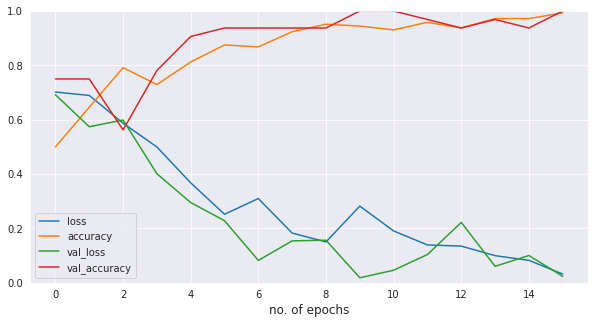

In [63]:
import seaborn as sb
import pandas as pd
sb.set_style('darkgrid')
pd.DataFrame(model1_fit.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('no. of epochs', fontsize=12)
plt.show()